<a href="https://colab.research.google.com/github/salimunlu47/HamdyTaha-Operations-Research-Textbook-/blob/main/Chapter2_Modeling_with_Linear_Programming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Two-Variable LP Model

##Example 2.1-1 (The Reddy Mikks Company)
Reddy Mikks produces both interior and exterior paints from two raw materials, M1 and M2.

The following table provides the basic data of the problem:

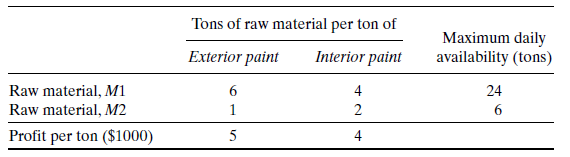

For the Reddy Mikks problem, we need to determine the daily amounts of exterior and interior paints to be produced. 

Thus the variables of the model are defined as:

x<sub>1</sub> = Tons produced daily of exterior paint

x<sub>2</sub> = Tons produced daily of interior paint

The goal of Reddy Mikks is to maximize (i.e., increase as much as possible) the total daily
profit of both paints.

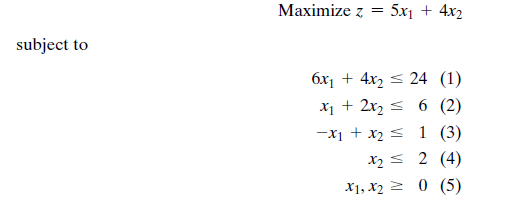

To define and solve optimization problems with SciPy, you need to import scipy.optimize.linprog():

In [1]:
from scipy.optimize import linprog

The next step is to define the input values:

Instead of maximizing z = x + 2y, you can minimize its negative(−z = −x − 2y).

In [2]:
obj = [-5, -4]
#      ─┬  ─┬
#       │   └┤ Coefficient for x2
#       └────┤ Coefficient for x1

In [3]:
lhs_ineq = [[ 6,  4],  # 1st constraint left side
            [ 1,  2],  # 2nd constraint left side
            [-1,  1],  # 3rd constraint left side
            [ 0,  1]]  # 4th constraint left side

In [4]:
rhs_ineq = [24,  # 1st constraint right side
            6,   # 2nd constraint right side
            1,   # 3rd constraint right side
            2]   # 4th constraint right side

The next step is to define the bounds for each variable in the same order as the coefficients. In this case, they’re both between zero and positive infinity:

In [5]:
bnd = [(0, float("inf")),  # Bounds of x1
       (0, float("inf"))]  # Bounds of x2

Finally, it’s time to optimize and solve your problem of interest. You can do that with `linprog()`:

In [6]:
opt = linprog(c=obj, 
              A_ub=lhs_ineq, 
              b_ub=rhs_ineq,
              bounds=bnd,
              method="revised simplex")
opt

     con: array([], dtype=float64)
     fun: -21.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0. , 0. , 2.5, 0.5])
  status: 0
 success: True
       x: array([3. , 1.5])

The solution is x<sub>1</sub> = 3 and x<sub>2</sub> = 1.5 with z = 5 * 3 + 4 * 1.5 = 21. This calls for a daily product mix of 3 tons of exterior paint and 1.5 tons of interior paint. The associated daily profit is $21,000.

#Solution of a Minimization Model

##Example 2.2-2 (diet Problem)

Ozark Farms uses at least 800 lb of special feed daily. The special feed is a mixture of corn and
soybean meal with the following compositions:

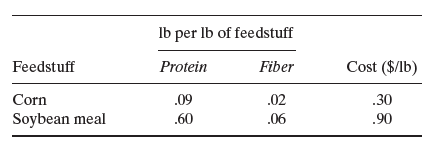



The dietary requirements of the special feed are at least 30% protein and at most 5% fiber.
The goal is to determine the daily minimum-cost feed mix.

The decision variables of the model are:

x1 = lb of corn in the daily mix

x2 = lb of soybean meal in the daily mix

The objective is to minimize the total daily cost (in dollars) of the feed mix—that is, 

Minimize z = .3x1 + .9x2

The constraints represent the daily amount of the mix and the dietary requirements. Ozark Farms needs at least 800 lb of feed a day—that is, 

x1 + x2 ≥ 800

The amount of protein included in x1 lb of corn and x2 lb of soybean meal is 1.09x1 + .6x22 lb. This quantity should equal at least 30% of the total feed mix 1x1 + x22 lb—that is,

.09x1 + .6x2 ≥ .3(x1 + x2)

In a similar manner, the fiber requirement of at most 5% is represented as

.02x1 + .06x2 ≤ .05(x1 + x2)

The complete model is

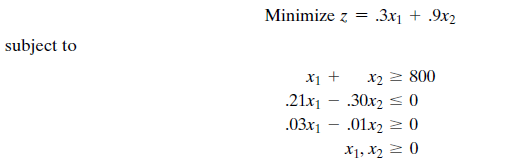

In [7]:
obj = [.3, .9]
#      ─┬  ─┬
#       │   └┤ Coefficient for x2
#       └────┤ Coefficient for x1

In [13]:
lhs_ineq = [[  -1,   -1],  # 1st constraint left side
            [ .21, -.30],  # 2nd constraint left side
            [-.03,  .01]]  # 3rd constraint left side

In [14]:
rhs_ineq = [-800,  # 1st constraint right side
               0,   # 2nd constraint right side
               0]   # 3rd constraint right side

The next step is to define the bounds for each variable in the same order as the coefficients. In this case, they’re both between zero and positive infinity:

In [15]:
bnd = [(0, float("inf")),  # Bounds of x1
       (0, float("inf"))]  # Bounds of x2

Finally, it’s time to optimize and solve your problem of interest. You can do that with linprog():

In [16]:
opt = linprog(c=obj, 
              A_ub=lhs_ineq, 
              b_ub=rhs_ineq,
              bounds=bnd,
              method="revised simplex")
opt

     con: array([], dtype=float64)
     fun: 437.6470588235294
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([ 0.        ,  0.        , 10.82352941])
  status: 0
 success: True
       x: array([470.58823529, 329.41176471])

In [17]:
opt = linprog(c=obj, 
              A_ub=lhs_ineq, 
              b_ub=rhs_ineq,
              bounds=bnd,
              method="simplex")
opt

     con: array([], dtype=float64)
     fun: 437.6470588235294
 message: 'Optimization terminated successfully.'
     nit: 3
   slack: array([ 0.        ,  0.        , 10.82352941])
  status: 0
 success: True
       x: array([470.58823529, 329.41176471])

#Investment

##Example 2.4-1 (Bank Loan Model)

Bank One is in the process of devising a loan policy that involves a maximum of $12 million. The following table provides the pertinent data about available loans.

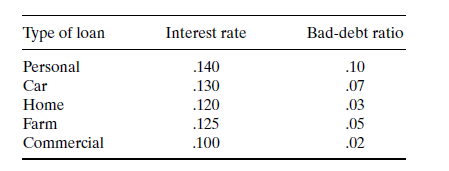

Bad debts are unrecoverable and produce no interest revenue.
Competition with other financial institutions dictates the allocation of at least 40% of the funds to farm and commercial loans. To assist the housing industry in the region, home loans must equal at least 50% of the personal, car, and home loans. The bank limits the overall ratio of bad debts on all loans to at most 4%.

Mathematical Model: The situation deals with determining the amount of loan in each category, thus leading to the following definitions of the variables:

x1 = personal loans (in millions of dollars)

x2 = car loans

x3 = home loans

x4 = farm loans

x5 = commercial loans

The objective of the Bank One is to maximize net return, the difference between interest revenue and lost bad debts. Interest revenue is accrued on loans in good standing. For example, when 10% of personal loans are lost to bad debt, the bank will receive interest on 90% of the loan—that is, it will receive 14% interest on .9x1 of the original loan x1. The same reasoning applies to the
remaining four types of loans.

Total interest = .141.9x12 + .131.93x22 + .121.97x32 + .1251.95x42 + .11.98x52
= .126x1 + .1209x2 + .1164x3 + .11875x4 + .098x5

We also have

Bad debt = .1x1 + .07x2 + .03x3 + .05x4 + .02x5

The objective function combines interest revenue and bad debt as:

Maximize z = Total interest - Bad debt

= (.126x1 + .1209x2 + .1164x3 + .11875x4 + .098x5) - (.1x1 + .07x2 + .03x3 + .05x4 + .02x5)

= .026x1 + .0509x2 + .0864x3 + .06875x4 + .078x5


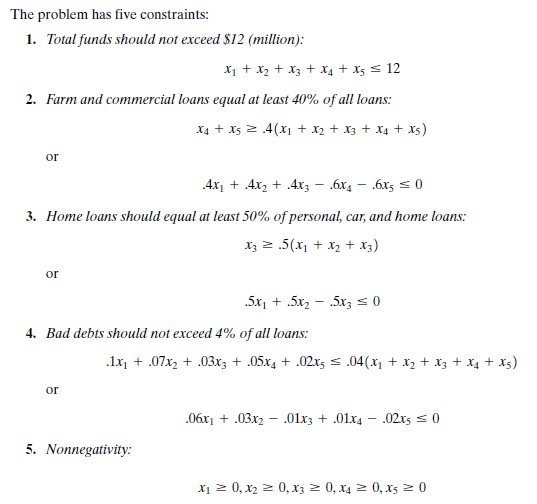

In [25]:
obj = [-.026, -.0509, -.0864, -.06875, -.078]


In [23]:
lhs_ineq = [[  1,   1,    1,   1,    1],  # 1st constraint left side
            [ .4,  .4,   .4, -.6,  -.6],  # 2nd constraint left side
            [ .5,  .5,  -.5,   0,    0],  # 3rd constraint left side
            [.06, .03, -.01, .01, -.02]]  # 4th constraint left side

In [20]:
rhs_ineq = [12,  # 1st constraint right side
             0,   # 2nd constraint right side
             0,   # 3rd constraint right side
             0]   # 4th constraint right side

In [21]:
bnd = [(0, float("inf")),  # Bounds of x1
       (0, float("inf")),  # Bounds of x2
       (0, float("inf")),  # Bounds of x3
       (0, float("inf")),  # Bounds of x4
       (0, float("inf"))]  # Bounds of x5

In [26]:
opt = linprog(c=obj, 
              A_ub=lhs_ineq, 
              b_ub=rhs_ineq,
              bounds=bnd,
              method="revised simplex")
opt

     con: array([], dtype=float64)
     fun: -0.9964799999999998
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([1.77635684e-15, 4.44089210e-16, 3.60000000e+00, 1.68000000e-01])
  status: 0
 success: True
       x: array([0. , 0. , 7.2, 0. , 4.8])